In [1]:
!chmod 777 /content/drive/MyDrive/infosec_ai/test.sh
!bash /content/drive/MyDrive/infosec_ai/test.sh

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
<Figure size 500x500 with 1 Axes>


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [3]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import pandas as pd

data_dir = '/content/drive/MyDrive/infosec_ai/정형, 비정형 데이터 처리/data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'
df_last = pd.read_csv(data_dir, encoding = 'euc-kr')

In [5]:
df = df_last.copy()
df["분양가격"] = pd.to_numeric( df_last["분양가격(㎡)"] , errors="coerce") 
df["평당분양가격"] = df["분양가격"] * 3.3
df["전용면적"] = df["규모구분"].str.replace("전용면적", "")
df["전용면적"] = df["전용면적"].str.replace("초과","~")
df["전용면적"] = df["전용면적"].str.replace("이하","")
df["전용면적"] = df["전용면적"].str.replace(" ","")
df["전용면적"] = df["전용면적"].str.strip()
df.drop(["규모구분","분양가격(㎡)"], axis=1, inplace = True)

In [6]:
df.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [7]:
df.groupby('지역명').mean()

,연도,월,분양가격,평당분양가격
지역명,,,,
강원,2017.352941,6.764706,2391.136364,7890.750000
경기,2017.352941,6.764706,4047.544000,13356.895200
경남,2017.352941,6.764706,2808.720648,9268.778138
경북,2017.352941,6.764706,2538.344398,8376.536515
광주,2017.352941,6.764706,3015.616915,9951.535821
대구,2017.352941,6.764706,3630.574380,11980.895455
대전,2017.352941,6.764706,3107.070707,10253.333333
부산,2017.352941,6.764706,3662.764000,12087.121200
서울,2017.352941,6.764706,7151.508000,23599.976400


In [8]:
df.groupby('지역명').mean()[['평당분양가격']].sort_values(['평당분양가격'])

,평당분양가격
지역명,
전남,7565.316532
충북,7634.655600
전북,7724.235484
강원,7890.750000
충남,8233.651883
경북,8376.536515
경남,9268.778138
세종,9796.516456
광주,9951.535821


In [9]:
df.groupby('지역명').mean()[['평당분양가격']].sort_values(['평당분양가격'], ascending = False)

,평당분양가격
지역명,
서울,23599.976400
경기,13356.895200
부산,12087.121200
대구,11980.895455
인천,11915.320732
제주,11241.276712
대전,10253.333333
울산,10014.902013
광주,9951.535821


In [10]:
df.groupby('전용면적')[['평당분양가격']].mean().sort_values(['평당분양가격'])

,평당분양가격
전용면적,
60㎡~85㎡,10271.040071
전체,10276.086207
60㎡,10375.137421
85㎡~102㎡,11097.599573
102㎡~,11517.705634


In [11]:
df.groupby(["전용면적","지역명"])[['평당분양가격']].mean()

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [12]:
grouped = df.groupby(["전용면적","지역명"])[["평당분양가격"]].mean()

In [13]:
grouped

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [14]:
grouped.xs("전체", level="전용면적")

,평당분양가격
지역명,
강원,7477.536000
경기,12559.602000
경남,8658.672000
경북,8078.532000
광주,9903.630000
대구,11771.298000
대전,9786.018000
부산,11936.166000
서울,22610.346000


In [15]:
grouped.xs("서울", level="지역명")

,평당분양가격
전용면적,
102㎡~,23446.038
60㎡,23212.794
60㎡~85㎡,22786.830
85㎡~102㎡,25943.874
전체,22610.346


In [16]:
grouped.unstack().round()

평당분양가격                            ...                                 
지역명           강원       경기       경남      경북  ...      전북       제주      충남      충북
전용면적                                        ...                                 
102㎡~     8311.0  14772.0  10358.0  9157.0  ...  8194.0  10523.0  8689.0  8195.0
60㎡       7567.0  13252.0   8689.0  7883.0  ...  7610.0  14022.0  7911.0  7103.0
60㎡~85㎡   7486.0  12524.0   8619.0  8061.0  ...  7271.0  10621.0  7819.0  7264.0
85㎡~102㎡  8750.0  13678.0  10018.0  8774.0  ...  8276.0  10709.0  9120.0  8391.0
전체        7478.0  12560.0   8659.0  8079.0  ...  7293.0  10785.0  7815.0  7219.0

[5 rows x 17 columns]

In [17]:
g = df.groupby(["연도","지역명"])[["평당분양가격"]].mean()

In [18]:
g.unstack()

평당분양가격                          ...                                     
지역명            강원        경기            경남  ...            제주           충남        충북
연도                                         ...                                     
2015  7188.060000  11060.94   8459.220000  ...   7951.075000  7689.880000  6828.800
2016  7162.903846  11684.97   8496.730000  ...   9567.480000  7958.225000  7133.335
2017  7273.560000  12304.98   8786.760000  ...  12566.730000  8198.422222  7473.120
2018  8219.255000  14258.42   9327.670000  ...  11935.968000  8201.820000  8149.295
2019  8934.475000  15665.54  10697.615789  ...  11828.469231  8748.840000  7970.875

[5 rows x 17 columns]

In [19]:
g.unstack().T

연도               2015          2016          2017          2018          2019
       지역명                                                                   
평당분양가격 강원    7188.060   7162.903846   7273.560000   8219.255000   8934.475000
       경기   11060.940  11684.970000  12304.980000  14258.420000  15665.540000
       경남    8459.220   8496.730000   8786.760000   9327.670000  10697.615789
       경북    7464.160   7753.405000   8280.800000   8680.776923   9050.250000
       광주    7916.700   9190.683333   9613.977551   9526.953333  12111.675000
       대구    9018.900  10282.030000  12206.700000  12139.252632  14081.650000
       대전    8190.600   8910.733333   9957.158491  10234.106667  12619.200000
       부산   10377.400  10743.535000  11560.680000  12889.965000  13537.865000
       서울   20315.680  21753.435000  21831.060000  23202.245000  28286.830000
       세종    8765.020   8857.805000   9132.505556  10340.463158  11299.394118
       울산    9367.600   9582.574138  10666.935714  10241.400000  10216.250000
       인천   10976.020  11099.055000  11640.600000  11881.532143  13249.775000
       전남    6798.880   6936.600000   7372.920000   7929.845000   8219.275862
       전북    7110.400   6906.625000   7398.973585   8174.595000   8532.260000
       제주    7951.075   9567.480000  12566.730000  11935.968000  11828.469231
       충남    7689.880   7958.225000   8198.422222   8201.820000   8748.840000
       충북    6828.800   7133.335000   7473.120000   8149.295000   7970.875000

In [20]:
pd.pivot_table(df, index = '지역명', columns = '전용면적', values = '평당분양가격', aggfunc = 'mean')

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [21]:
pd.pivot_table(df, index = '전용면적', columns = '지역명', values = '평당분양가격', aggfunc= 'mean').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [22]:
p = pd.pivot_table(
    df,
    index=["연도","지역명"],
    #columns=["전용면적"],
    values="평당분양가격",
    aggfunc="mean"
)

In [23]:
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

In [24]:
p.loc[2019]

,평당분양가격
지역명,
강원,8934.475000
경기,15665.540000
경남,10697.615789
경북,9050.250000
광주,12111.675000
대구,14081.650000
대전,12619.200000
부산,13537.865000
서울,28286.830000


In [25]:
df[df["연도"] == 2019]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3315,서울,2019,1,7600.0,25080.0,전체
3316,서울,2019,1,7400.0,24420.0,60㎡
3317,서울,2019,1,8105.0,26746.5,60㎡~85㎡
3318,서울,2019,1,6842.0,22578.6,85㎡~102㎡
3319,서울,2019,1,7787.0,25697.1,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [26]:
q1 = df[df["연도"] == 2019]['평당분양가격'].quantile(0.25)

In [27]:
q3 = df[df["연도"] == 2019]['평당분양가격'].quantile(0.75)

In [28]:
iqr = q3 - q1

In [29]:
outlier_min_limit = q1 - iqr * 1.5
outlier_max_limit = q3 + iqr * 1.5

In [30]:
outlier_min_limit, outlier_max_limit

(1614.9375000000018, 20500.837499999994)

In [31]:
df[(df["연도"] == 2019) & (df["평당분양가격"] > outlier_min_limit)]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3315,서울,2019,1,7600.0,25080.0,전체
3316,서울,2019,1,7400.0,24420.0,60㎡
3317,서울,2019,1,8105.0,26746.5,60㎡~85㎡
3318,서울,2019,1,6842.0,22578.6,85㎡~102㎡
3319,서울,2019,1,7787.0,25697.1,102㎡~
...,...,...,...,...,...,...
4327,경남,2019,12,3065.0,10114.5,60㎡~85㎡
4328,경남,2019,12,3247.0,10715.1,85㎡~102㎡
4330,제주,2019,12,3882.0,12810.6,전체
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡


In [32]:
df[(df["연도"] == 2019) & (df["평당분양가격"] > outlier_max_limit) ]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3315,서울,2019,1,7600.0,25080.0,전체
3316,서울,2019,1,7400.0,24420.0,60㎡
3317,서울,2019,1,8105.0,26746.5,60㎡~85㎡
3318,서울,2019,1,6842.0,22578.6,85㎡~102㎡
3319,서울,2019,1,7787.0,25697.1,102㎡~
3400,서울,2019,2,7627.0,25169.1,전체
3401,서울,2019,2,7654.0,25258.2,60㎡
3402,서울,2019,2,8141.0,26865.3,60㎡~85㎡
3403,서울,2019,2,6842.0,22578.6,85㎡~102㎡
3404,서울,2019,2,7328.0,24182.4,102㎡~


In [33]:
df[(df["연도"] == 2019) & (df["평당분양가격"] > outlier_max_limit) ].shape

(60, 6)

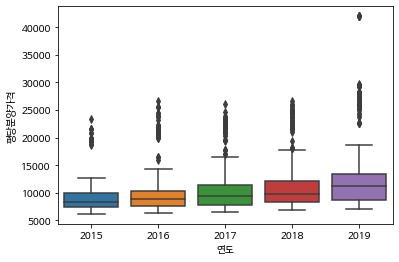

In [34]:
sns.boxplot(data=df, x="연도", y="평당분양가격")

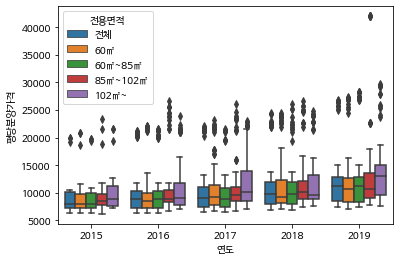

In [35]:
sns.boxplot(data=df, x="연도", y="평당분양가격", hue="전용면적")

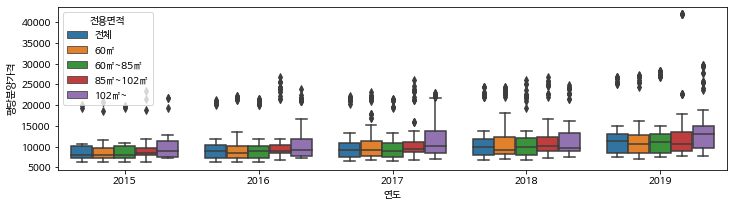

In [36]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df, x="연도", y="평당분양가격", hue="전용면적")

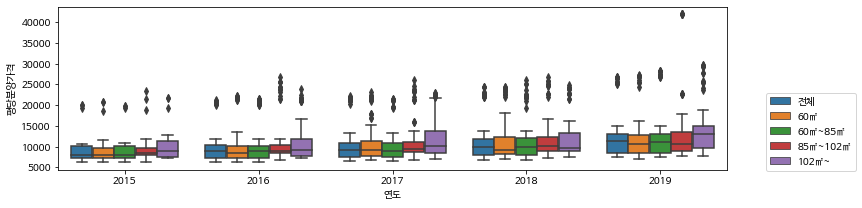

In [37]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df, x="연도", y="평당분양가격", hue="전용면적")
plt.legend(bbox_to_anchor=(1.05, 0.5))

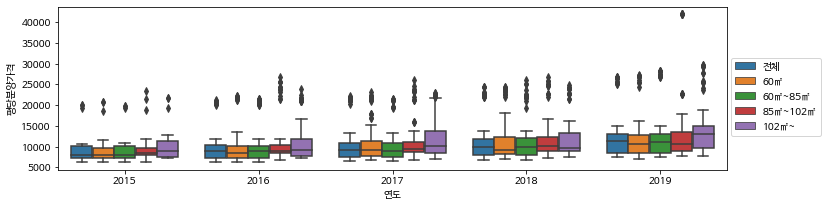

In [38]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df, x="연도", y="평당분양가격", hue="전용면적")
plt.legend(bbox_to_anchor=(1.05, 0.5), borderaxespad=-3)

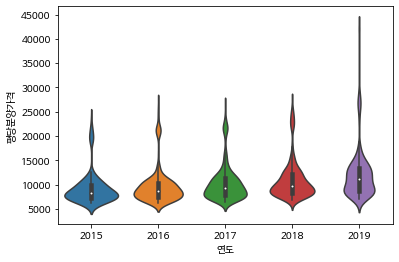

In [39]:
sns.violinplot(data=df, x="연도", y="평당분양가격")

In [40]:
pd.pivot_table(
      df,
      index=["연도"],
      values=["평당분양가격"],
      aggfunc="mean"
      )

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092


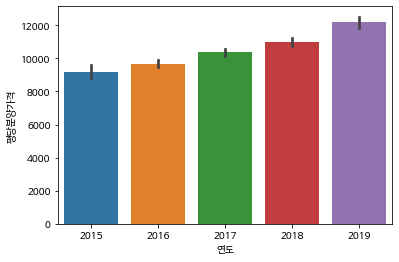

In [41]:
sns.barplot(data=df, x="연도", y="평당분양가격")

In [42]:
score_df = pd.DataFrame({
    "학과":["컴공", "보안", "컴공", "보안", "컴공"],
    "학년":[ 1    ,  2    ,   2   ,   1,     2    ],
    "영어":[90    ,  80   ,   100,    90,     70  ]
})

In [43]:
score_df

,학과,학년,영어
0,컴공,1,90
1,보안,2,80
2,컴공,2,100
3,보안,1,90
4,컴공,2,70


In [44]:
score_df[['학과', '영어']].groupby('학과').mean()

,영어
학과,
보안,85.000000
컴공,86.666667


In [45]:
score_df.groupby(['학과', '학년']).mean()

영어
학과 학년    
보안 1   90
   2   80
컴공 1   90
   2   85

In [46]:
pd.pivot_table(score_df, index = "학과", columns = "학년", values = "영어", aggfunc = "mean")

학년,1,2
학과,,
보안,90,80
컴공,90,85


In [47]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
t_df = titanic[['age', 'sex', 'class', 'fare', 'survived']]

In [49]:
t_df.groupby(['class', 'sex']).mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [50]:
t_df.groupby(["class","sex"]).get_group(("Third","female"))

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


In [51]:
t_df.groupby(["class"]).std()

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [52]:
t_df.groupby(["class"]).fare.std()

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [53]:
t_df.groupby(["class"]).std()[["fare"]]

,fare
class,
First,78.380373
Second,13.417399
Third,11.778142


In [54]:
pd.pivot_table(t_df, index = 'class', columns = 'sex', values = 'age', aggfunc = 'mean')

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [55]:
pd.pivot_table(t_df, index = 'class', columns = 'sex', values = 'survived', aggfunc = 'mean')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [56]:
pd.pivot_table(t_df, index = 'class', columns = 'sex', values = 'survived', aggfunc = ['mean', 'sum'])

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [57]:
pd.pivot_table(t_df, index = "class", columns = "sex", values = "survived",aggfunc="mean")

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [58]:
pd.pivot_table(t_df, index = "class", columns = "sex", values = "survived",aggfunc = ["mean","sum"])

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [59]:
 pd.pivot_table(t_df, index = ["class","sex"], columns = "survived", values = "fare", aggfunc = "mean")

survived                0           1
class  sex                           
First  female  110.604167  105.978159
       male     62.894910   74.637320
Second female   18.250000   22.288989
       male     19.488965   21.095100
Third  female   19.773093   12.464526
       male     12.204469   15.579696

In [60]:
 pd.pivot_table(t_df, index = ["class","sex"], columns = "survived", values = ["fare", "age"], aggfunc = "mean")

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [61]:
score_df = pd.DataFrame({
    "학과":["컴공", "보안", "컴공", "보안", "컴공","컴공","보안","보안"],
    "학년":[ 1    ,  2    ,   2   ,   1,     2    ,  1,     1,     2],
    "영어":[90    ,  80   ,   100,    90,     70  , 100,    90,    80]
})

In [62]:
pd.pivot_table(score_df,
               index = '학과',
               values = '영어')

,영어
학과,
보안,85
컴공,90


In [63]:
import matplotlib as mlp
import matplotlib.pyplot as plt

In [64]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [65]:
plt.style.use('seaborn-notebook')

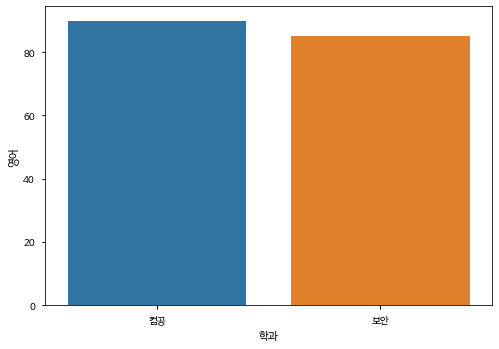

In [66]:
import seaborn as sns

sns.barplot(data = score_df, x = '학과', y = '영어', ci = None)

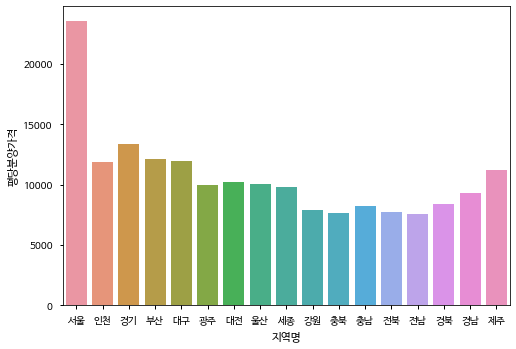

In [67]:
sns.barplot(data = df, x = '지역명', y = '평당분양가격', ci = None)

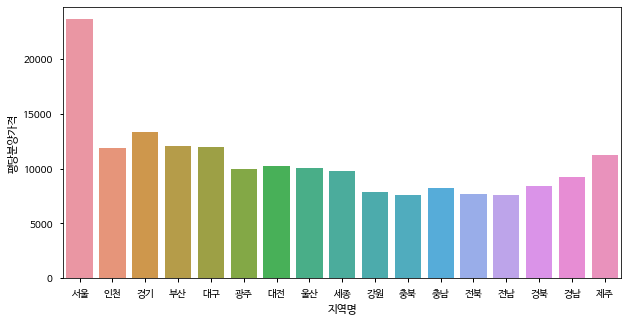

In [68]:
plt.figure(figsize = (10, 5))
sns.barplot(data = df, x = '지역명', y = '평당분양가격', ci = None)

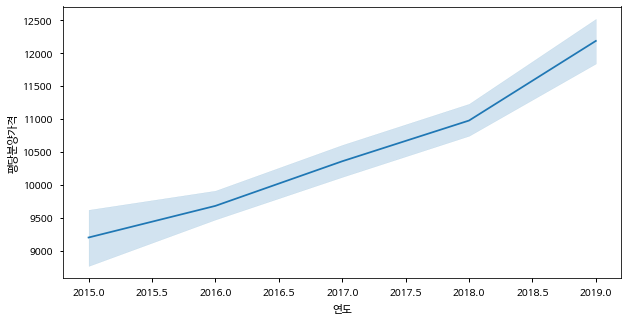

In [69]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = '연도', y = '평당분양가격')

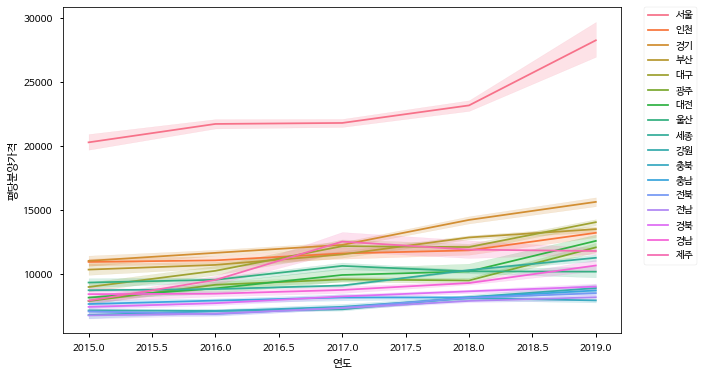

In [70]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = '연도', y = '평당분양가격', hue = '지역명')
plt.legend(bbox_to_anchor = (1.04, 1), borderaxespad = 0) # borderaxespad + : 아래로, - : 위로

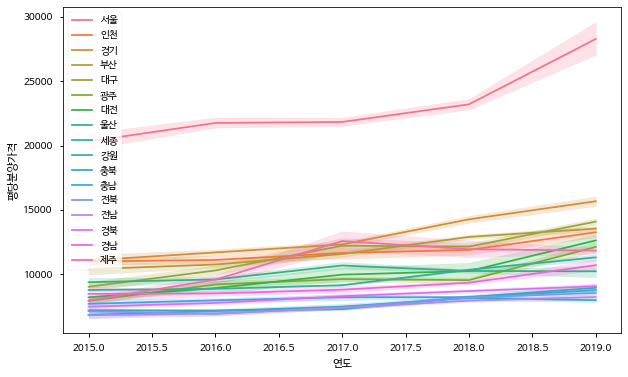

In [71]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = '연도', y = '평당분양가격', hue = '지역명')
plt.legend(loc = 'upper left')

In [72]:
lst1 = list(range(0, 101))

In [73]:
import random

In [74]:
random.shuffle(lst1)

In [75]:
lst1.append(-80)

In [76]:
lst1.append(170)

In [77]:
lst_df = pd.DataFrame({"컬럼1" : lst1})

In [78]:
lst_df

,컬럼1
0,97
1,54
2,5
3,0
4,100
...,...
98,58
99,29
100,71
101,-80


In [79]:
lst_df['컬럼1'].describe()

count    103.000000
mean      49.902913
std       33.889820
min      -80.000000
25%       24.500000
50%       50.000000
75%       75.500000
max      170.000000
Name: 컬럼1, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


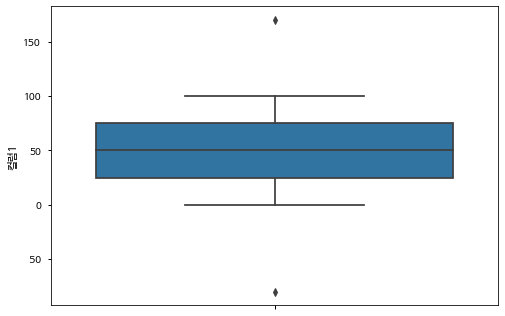

In [80]:
sns.boxplot(data = lst_df, y = '컬럼1')

{'boxes': [<matplotlib.lines.Line2D at 0x7f5744e60b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5744df0550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5744df8590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5744df8050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5744deba90>,
  <matplotlib.lines.Line2D at 0x7f5744debfd0>]}

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


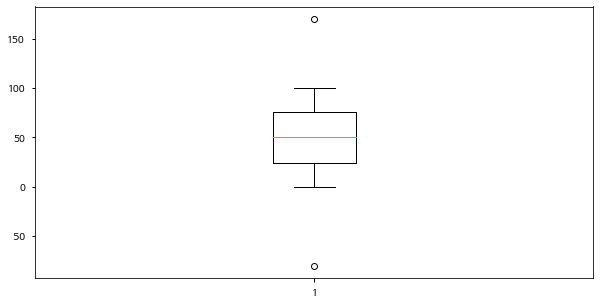

In [81]:
plt.figure(figsize = (10, 5))
plt.boxplot(lst_df['컬럼1'])

In [82]:
lst_df['컬럼1'].quantile(0.25)

24.5

In [83]:
lst_df['컬럼1'].quantile(0.75)

75.5

In [84]:
iqr = lst_df['컬럼1'].quantile(0.75) - lst_df['컬럼1'].quantile(0.25)

In [85]:
q1 = lst_df['컬럼1'].quantile(0.25) - 1.5 * iqr
q3 = lst_df['컬럼1'].quantile(0.75) + 1.5 * iqr

In [86]:
q1,q3

(-52.0, 152.0)